In [ ]:
# Libraries

import numpy as np
import random as rd
from random import randint
import random
from time import time
import itertools
import matplotlib.pyplot as plt

In [ ]:
# Genetic Algorithm Class

class GeneticSolver:
    def __init__(self, weights, profits,  capacity):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity
        self.population = None
        self.population_size = None
        self.num_generations = 20

    def set_initial_population(self):
        chromosomes = len(self.profits)
        self.population_size = (chromosomes, len(self.profits))
        self.population = np.random.randint(2, size=self.population_size).astype(int)

    def cal_fitness(self):
        sum_of_profits = self.population.dot(self.profits)
        sum_of_weights = self.population.dot(self.weights)
        exceeded_populations = np.where(sum_of_weights > self.capacity)[0]
        while len(exceeded_populations) > (0.3 * self.population.shape[0]):
            new_populations = self.population[exceeded_populations].flatten()
            indexes = np.where(new_populations == 1)[0]
            indexes = np.random.choice(indexes, int(len(new_populations) * 0.3))
            new_populations[indexes] = 0
            new_populations = new_populations.reshape((-1, len(self.profits)))
            self.population[exceeded_populations] = new_populations
            sum_of_profits = self.population.dot(self.profits)
            sum_of_weights = self.population.dot(self.weights)
            exceeded_populations = np.where(sum_of_weights > self.capacity)[0]
        sum_of_profits[exceeded_populations] = 0
        return sum_of_profits.astype(int)

    def selection(self, fitness, num_parents, selection_type='max'):
        fitness = list(fitness)
        new_generation = np.empty((num_parents, self.population.shape[1]))
        if selection_type == 'max':
            for i in range(num_parents):
                if selection_type == 'max':
                    max_fitness_idx = np.where(fitness == np.max(fitness))
                    new_generation[i, :] = self.population[max_fitness_idx[0][0], :]
                    fitness[max_fitness_idx[0][0]] = -1

        elif selection_type == 'RWS':
            survive_chances = [fit_value / sum(fitness) for fit_value in fitness]
            new_generation = random.choices(self.population,
                                              weights=survive_chances,
                                              k=num_parents)
            new_generation = np.asarray(new_generation)

        return new_generation

    def crossover(self, parents, num_offsprings):
        offsprings = np.empty((num_offsprings, parents.shape[1]))
        crossover_point = int(parents.shape[1] / 2) # Changing Half Chromosome
        crossover_rate = 0.8 # Rate of Frequency of doing Crossover
        i = 0
        while (i < num_offsprings):
            x = rd.random()
            if x > crossover_rate:
                continue
            parent1_index = i % parents.shape[0]
            parent2_index = (i + 1) % parents.shape[0]
            offsprings[i, 0:crossover_point] = parents[parent1_index, 0:crossover_point]
            offsprings[i, crossover_point:] = parents[parent2_index, crossover_point:]
            i += 1
        return offsprings

    def mutation(self, offsprings):
        mutants = np.empty((offsprings.shape))
        mutation_rate = 0.6
        for i in range(mutants.shape[0]):
            random_value = rd.random()
            mutants[i, :] = offsprings[i, :]
            if random_value > mutation_rate:
                continue
            int_random_value = randint(0, offsprings.shape[1] - 1)
            if mutants[i, int_random_value] == 0:
                mutants[i, int_random_value] = 1
            else:
                mutants[i, int_random_value] = 0
        return mutants


    def solve(self):
        result = {}
        self.set_initial_population()
        parameters, fitness_history = [], []
        num_parents = int(self.population_size[0] / 2)
        num_offsprings = self.population_size[0] - num_parents
        for i in range(self.num_generations):
            fitness = self.cal_fitness()
            fitness_history.append(fitness)
            new_generation = self.selection(fitness, num_parents)
            offsprings = self.crossover(new_generation, num_offsprings)
            mutants = self.mutation(offsprings)
            self.population[0:new_generation.shape[0], :] = new_generation
            self.population[new_generation.shape[0]:, :] = mutants
        fitness_last_gen = self.cal_fitness()
        max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
        result_answer = self.population[max_fitness[0][0], :]
        result['weight'] = sum(itertools.compress(self.weights, result_answer))
        result['answers'] = result_answer
        result['profit'] = sum(itertools.compress(self.profits, result_answer))
        return result

In [ ]:
# Main Helper Function which helps to execute the Knapsack using GeneticSolver Class

def helper(weights, profits, capacity):

    # Create an Object of the GeneticSolver class
    genetic_solver = GeneticSolver(weights, profits, capacity)

    final_result = {'w': 0, 'p': 0, 'c': []}
    graph = {'w': [], 'p': []}

    for _ in range(500):

        result = genetic_solver.solve()

        graph['w'].append(result['weight'])
        graph['p'].append(result['profit'])

        if result['profit'] > final_result['p']:
            final_result['p'] = result['profit']
            final_result['w'] = result['weight']
            final_result['c'] = result['answers']
        elif result['profit'] == final_result['p']:
            if result['weight'] < final_result['w']:
                final_result['p'] = result['profit']
                final_result['w'] = result['weight']
                final_result['c'] = result['answers']

    print("Weight:", final_result['w'])
    print("Profit:", final_result['p'])
    print("Chosen items:", final_result['c'])
    print("")

    plt.scatter(graph['w'], graph['p'], marker='o', label='Data Points')
    plt.xlabel('Weight')
    plt.ylabel('Profit')
    plt.title('Weight vs. Profit')
    plt.legend()
    plt.show()

Weight: 11
Profit: 29
Chosen items: [1 0 0 0 0]



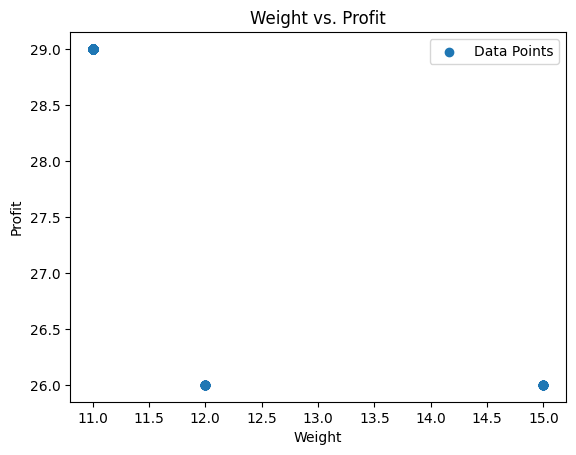

In [ ]:
# 5 Data Points

weights = np.array([11, 15, 12, 10, 6])
profits = np.array([29, 26, 26, 10, 17])
capacity = 15
helper(weights, profits, capacity)

Weight: 30
Profit: 157
Chosen items: [1 0 1 1 0 0 1 0 1 0]



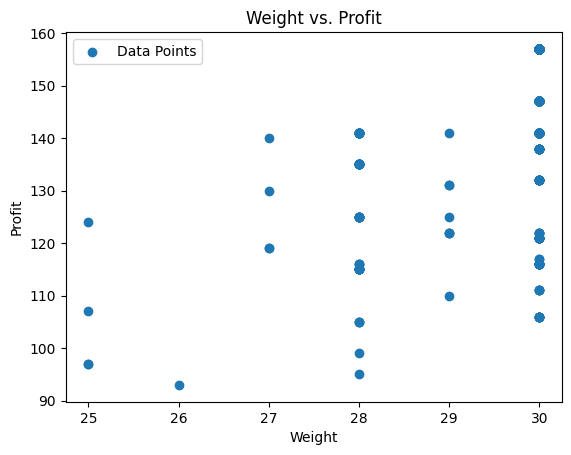

In [ ]:
# 10 Data Points

weights = np.array([9, 9, 6, 3, 9, 13, 11, 15, 1, 15])
profits = np.array([42, 32, 34, 17, 26, 18, 48, 30, 16, 40])
capacity = 30
helper(weights, profits, capacity)

Weight: 50
Profit: 290
Chosen items: [0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1]



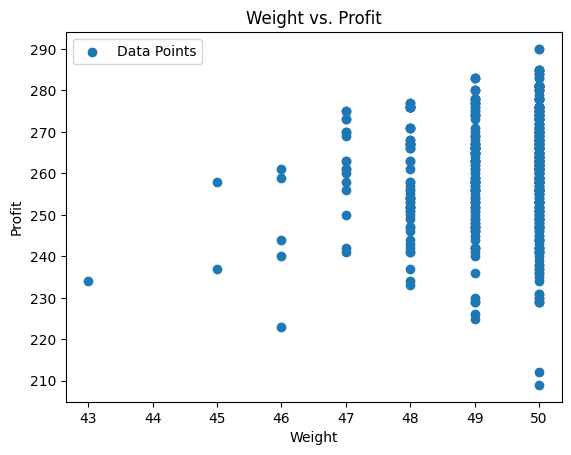

In [ ]:
# 20 Data Points

weights = np.array([5, 8, 3, 12, 2, 10, 7, 4, 9, 11, 15, 6, 14, 1, 5, 8, 13, 7, 2, 6])
profits = np.array([20, 25, 15, 40, 35, 18, 28, 22, 45, 32, 50, 27, 38, 12, 29, 42, 19, 33, 15, 30])
capacity = 50
helper(weights, profits, capacity)

Weight: 98
Profit: 688
Chosen items: [1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0]



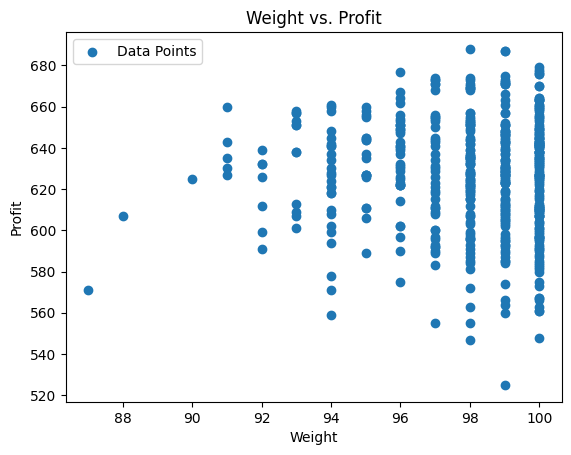

In [ ]:
# 30 Data Points

weights = np.array([2, 8, 7, 12, 13, 15, 9, 4, 9, 2, 4, 3, 2, 7, 11, 4, 5, 9, 8, 3, 15, 7, 1, 3, 14, 1, 1, 14, 15, 11])
profits = np.array([37, 12, 21, 37, 20, 16, 32, 30, 45, 32, 50, 29, 32, 41, 20, 47, 48, 13, 40, 13, 38, 25, 31, 10, 46, 27, 46, 31, 11, 21])
capacity = 100
helper(weights, profits, capacity)